In [6]:
import pandas as pd

#data_path = "https://raw.githubusercontent.com/marcosdh1987/meter01/main/RE_Log20181214.csv?token=AHQEZ4P7WR5UISJ2KKJ4X6K7XZSBK"

ds1 = pd.read_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\TestCorcovo\RE_Log20181212.csv')
ds2 = pd.read_csv(r'C:\Users\e196315\Documents\RedLine\Argentina\ECN-3022\RE_Log20181214.csv')
#ds3 = pd.read_csv(data_path)

ds2.describe()


,WLR [%],Well#,Status,XL [-],PC1 [nA],PC2 [nA],PC3 [nA],PC4 [nA],Tb [C],4-20mA In [counts],Freq. In [Hz],Flow Rate
count,9470.000000,9470.0,9470.0,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.0,9470.0
mean,98.435238,10.0,0.0,0.872761,21842.564671,336.625510,11910.872534,1771.713188,31.521679,0.196727,0.0,0.0
std,2.426000,0.0,0.0,0.155936,3411.620680,175.488279,1133.029594,227.367835,1.023373,0.397545,0.0,0.0
min,59.940000,10.0,0.0,0.148000,3744.770000,209.720000,4754.610000,396.820000,29.300000,0.000000,0.0,0.0
25%,98.180000,10.0,0.0,0.791000,20248.515000,245.900000,11559.837500,1688.920000,30.900000,0.000000,0.0,0.0
50%,98.710000,10.0,0.0,0.922000,22168.030000,276.855000,12066.290000,1799.010000,32.100000,0.000000,0.0,0.0
75%,99.470000,10.0,0.0,0.997000,25015.512500,347.495000,12718.180000,1954.180000,32.300000,0.000000,0.0,0.0
max,100.000000,10.0,0.0,1.054000,25378.930000,2635.910000,17886.700000,2670.890000,32.400000,1.000000,0.0,0.0


In [2]:
import numpy as np
from math import log

A = ds2[['PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]']]
Xl = ds2['XL [-]']
outputs = ds2['WLR [%]']

aw = np.full((9470,4),[-0.0170,2.9304,0.5466,0.5366])
ao = np.full((9470,4),[3.1292,2.4890,1.8896,3.0607])
acal = np.full((9470,4),[30092.8,2730.3,28477.1,4664.3])


aw_d = pd.DataFrame(aw)
ao_d = pd.DataFrame(ao)

A1 = -(np.log(A/acal))

#inputs = pd.DataFrame(ds2[['PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]','XL [-]']])
inputs = pd.DataFrame(A1[['PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]']])
inputs['XL [-]'] = ds2['XL [-]']
inputs[['aw1','aw2','aw3','aw4']] = aw_d[:]
inputs[['ao1','ao2','ao3','ao4']] = ao_d[:]

print(inputs.head())
print(inputs.shape)
#print(outputs.head())

   PC1 [nA]  PC2 [nA]  PC3 [nA]  PC4 [nA]  XL [-]    aw1     aw2     aw3  \
0  0.397516  2.454711  0.946101  1.065108   0.973 -0.017  2.9304  0.5466   
1  0.394186  2.438762  0.961490  1.055181   0.957 -0.017  2.9304  0.5466   
2  0.289349  2.436792  0.886965  0.963864   0.987 -0.017  2.9304  0.5466   
3  0.349366  2.446726  0.931154  1.024274   0.971 -0.017  2.9304  0.5466   
4  0.388738  2.485368  0.962575  1.054307   0.978 -0.017  2.9304  0.5466   

      aw4     ao1    ao2     ao3     ao4  
0  0.5366  3.1292  2.489  1.8896  3.0607  
1  0.5366  3.1292  2.489  1.8896  3.0607  
2  0.5366  3.1292  2.489  1.8896  3.0607  
3  0.5366  3.1292  2.489  1.8896  3.0607  
4  0.5366  3.1292  2.489  1.8896  3.0607  
(9470, 13)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,outputs, test_size= 0.3, random_state=42)

In [4]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Sequential
from keras.models import Model

model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.callbacks import Callback

# Display training progress by printing a single dot for each completed epoch
class PrintDot(Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
#Visualize the model's training progress using the stats stored in the history object.
from keras.callbacks import History 
history = History()
    
    
history = model.fit(X_train,y_train, epochs=200, validation_split = 0.2, batch_size=50,verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [22]:
#Visualize the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,loss,epoch
195,0.272490,0.236863,195
196,0.317701,0.239374,196
197,0.252194,0.291229,197
198,0.355299,0.249312,198
199,0.216331,0.256938,199


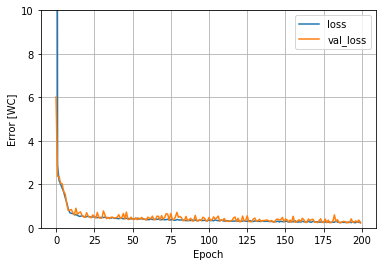

In [25]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [WC]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [24]:
model.evaluate(X_test,y_test)

2841/2841 [==============================] - 0s 20us/step


0.2210399032803498

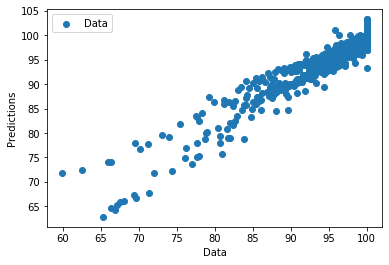

In [26]:

plt.scatter(outputs, model.predict(inputs), label='Data')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [27]:
#individual prediction

#dataset input
x = inputs.iloc[3:4]
y = outputs.iloc[3:4]
#manual input 
# 'PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]','XL [-]','aw1','aw2','aw3','aw4','ao1','ao2','ao3','ao4'
#x = pd.DataFrame([[25195.03,239.13,12856.83,1987.97,1.033,-0.0170,2.9304,0.5466,0.5366,3.1292,2.4890,1.8896,3.0607]])
#y = '97.91'



print('prediction = ', model.predict(x) )
print('Trained value = ', y )

prediction =  [[97.72292]]
Trained value =  3    98.24
Name: WLR [%], dtype: float64
